In [218]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
sns.set_style("whitegrid")

In [2]:
dataBook=pd.read_csv('/Users/sandrine//Desktop/Prework/Projects_Ironhack/Book_loan/docprets.csv',sep=';')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Objectif : Analyse Book loan trends of Parisian people and predict number of Loan per books

In [ ]:
""" Loan may depend on:
Book "Age"(accessible via Year column), 
the librairie and its stock,
the author,
the publisher (column Editeur)
the format

In [302]:
#dataBook.head()

In [4]:
#Check general info from DataFrame
dataBook.shape,dataBook.dtypes

((815534, 103),
 N° de notice                        int64
 ISBN                               object
 ISSN                               object
 EAN                                object
 Langue                             object
                                     ...  
 Co-auteur                          object
 Auteur secondaire                  object
 Collectivité auteur                object
 Collectivité auteur secondaire     object
 Collectivité co-auteur             object
 Length: 103, dtype: object)

In [97]:
dataBook['N°_de_notice'].unique().size==dataBook.shape[0]
#N°_de_notice could be an index for the dataset

True

In [5]:
#Replace ' ' by '_in column names'
dataBook.columns=dataBook.columns.str.replace(' ','_')
dataBook.columns.to_list()

['N°_de_notice',
 'ISBN',
 'ISSN',
 'EAN',
 'Langue',
 'Titre',
 'Edition',
 'Editeur',
 'Date',
 'Format',
 'Collection',
 'Titre_de_série',
 'N°',
 'Auteur_Nom',
 'Auteur_Prénom',
 'Auteur_Dates',
 'Co-auteur_Nom',
 'Co-auteur_Prénom',
 'Dates',
 'Auteur_secondaire_Nom',
 'Auteur_secondaire_Prénom',
 'Auteur_secondaire_Dates',
 'Auteur_collectivité',
 'Subdivision_auteur_collectivité',
 'Co-auteur_collectivité',
 'Subdivision_co-auteur_collectivité',
 'Auteur_secondaire_collectivité',
 'Subdivision_auteur_secondaire_collectivité',
 'Indice',
 'Cote_majoritaire',
 'Type_de_document',
 'Nombre_de_localisations',
 'Nombre_de_prêt_total',
 'Nombre_de_prêts_2017',
 'Nombre_de_prêt_année_2018_au_26_juillet_2018',
 "Nombre_d'exemplaires",
 'Catégorie_statistique_1',
 'Catégorie_statistique_2',
 'Aimé_Césaire',
 'Amélie',
 'André_Malraux',
 'Andrée_Chedid',
 'Arthur_Rimbaud',
 'Assia_Djebar',
 'Batignolles',
 'Benjamin_Rabier',
 'Buffon',
 'Canopée_-_la_fontaine',
 'Chaptal',
 'Charlotte_Del

In [6]:
# Prepare list of columns to drop due to missing values
to_drop=[]
to_drop.extend(dataBook.iloc[:,100:103].columns.to_list())
#Prepare list of columns for which we want to get dummies
Dummies_NA=[]


# NULL VALUES TREATMENT

In [7]:
#Check Number of Null values per columns
dataBook.isna().sum().to_dict()

{'N°_de_notice': 0,
 'ISBN': 323243,
 'ISSN': 813046,
 'EAN': 416532,
 'Langue': 81024,
 'Titre': 0,
 'Edition': 753989,
 'Editeur': 5012,
 'Date': 4727,
 'Format': 9126,
 'Collection': 452201,
 'Titre_de_série': 731570,
 'N°': 747164,
 'Auteur_Nom': 195970,
 'Auteur_Prénom': 226043,
 'Auteur_Dates': 479400,
 'Co-auteur_Nom': 742303,
 'Co-auteur_Prénom': 745706,
 'Dates': 780798,
 'Auteur_secondaire_Nom': 434722,
 'Auteur_secondaire_Prénom': 445681,
 'Auteur_secondaire_Dates': 643727,
 'Auteur_collectivité': 778776,
 'Subdivision_auteur_collectivité': 814619,
 'Co-auteur_collectivité': 812310,
 'Subdivision_co-auteur_collectivité': 815398,
 'Auteur_secondaire_collectivité': 734528,
 'Subdivision_auteur_secondaire_collectivité': 812303,
 'Indice': 382046,
 'Cote_majoritaire': 3,
 'Type_de_document': 2,
 'Nombre_de_localisations': 1,
 'Nombre_de_prêt_total': 36674,
 'Nombre_de_prêts_2017': 3,
 'Nombre_de_prêt_année_2018_au_26_juillet_2018': 44298,
 "Nombre_d'exemplaires": 3,
 'Catégorie_

In [8]:
#dataBook["Auteur_Dates"].value_counts()
#Column not necessary for the model so I drop it.
to_drop.append('Auteur_Dates')

In [9]:
#check whether I can drop or replace 'Auteur', 'Auteur Prenom' and 'Auteur Nom' columns
dftest=dataBook[(dataBook['Auteur_Nom']+', '+dataBook['Auteur_Prénom'])!=dataBook['Auteur']]
df=dftest[(dftest['Auteur_Nom']==dftest['Auteur'])|(dftest['Auteur_Prénom']==dftest['Auteur'])]
df[['Auteur_Nom','Auteur_Prénom','Auteur']]

df1=dftest[(dftest['Auteur_Nom']!=dftest['Auteur'])&(dftest['Auteur_Prénom']!=dftest['Auteur'])]
df1[['Auteur_Nom','Auteur_Prénom','Auteur']]
df1['Auteur_Prénom'].isna().sum()==df1['Auteur_Nom'].isna().sum()==df1['Auteur'].isna().sum()
#Author column is a mix of columns 'Auteur_Nom' and 'Auteur_Prénom' . However the format of Author does not
#suit me.


True

In [43]:
# I will create a  new column for Author.
dataBook['Author']=dataBook['Auteur_Prénom']+'|'+dataBook['Auteur_Nom']
dataBook['Author'].fillna('UnknownAuthor',inplace=True)
dataBook['Author']=dataBook['Author'].map(lambda x : merge_authors(x))
#dataBook[dataBook['Author'].isna()]


In [11]:
to_drop.extend(['Auteur_Prénom','Auteur_Nom','Auteur'])

In [13]:
#check whether I can drop or replace 'Auteur_secondaire_Nom', 'Auteur_secondaire_Prénom' 
#and 'Auteur_secondaire' columns. Auteur secondaire include translaters.
#df3=dataBook[(dataBook['Auteur_secondaire_Nom']+', '+dataBook['Auteur_secondaire_Prénom'])!=dataBook['Auteur_secondaire']]
#df3[['Auteur_secondaire_Nom','Auteur_secondaire_Prénom','Auteur_secondaire']]
# same conclusions as for Author.

In [40]:
def merge_authors(x):
    if ';' in x:
        y=x.split('|')
        z=[i for i in zip(y[0].split(';'),y[1].split(';'))]
        w=[' '.join(i) for i in z]
        return w
    else:
        w=x.replace("|", " ")
        return w
    
authors="Watson;Stephen;Padmore;Varcoe;Hickox,|Janice;Pamela Helen;Mark;Stephen;Richard"
test='Liliane|Princet'
y=merge_authors(test)
y

'Liliane Princet'

In [45]:
# I will create a  new column for Secondary Author.

dataBook['Author_secondary']=dataBook['Auteur_secondaire_Prénom']+'|'+dataBook['Auteur_secondaire_Nom']
dataBook['Author_secondary'].fillna('UnknownAuthor',inplace=True)
dataBook['Author_secondary']=dataBook['Author_secondary'].map(lambda x : merge_authors(x))

In [16]:
to_drop.extend(['Auteur_secondaire_Prénom','Auteur_secondaire_Nom','Auteur_secondaire'])

In [20]:
#dataBook["Co-auteur_Nom"].value_counts()

In [47]:
# I will create a  new column for Co Author Author.

dataBook['Co_Author']=dataBook['Co-auteur_Prénom']+'|'+dataBook['Co-auteur_Nom']
dataBook['Co_Author'].fillna('UnknownAuthor',inplace=True)
dataBook['Co_Author']=dataBook['Co_Author'].map(lambda x : merge_authors(x))

In [49]:
#dataBook[dataBook['N°_de_notice']==176958].to_dict()

In [53]:
#dataBook["Auteur_secondaire_Dates"].value_counts()
to_drop.append('Auteur_secondaire_Dates')

In [ ]:
# Avoir si je droppeou si cela a un intérêt plus tard.

#to_drop2=(['Auteur_collectivité','Subdivision_auteur_collectivité','Co-auteur_collectivité','Subdivision_co-auteur_collectivité','Auteur_secondaire_collectivité','Subdivision_auteur_secondaire_collectivité'])

"""'Auteur_collectivité'])
 'Subdivision_auteur_collectivité': 814619,
 'Co-auteur_collectivité': 812310,
 'Subdivision_co-auteur_collectivité': 815398,
 'Auteur_secondaire_collectivité': 734528,
 'Subdivision_auteur_secondaire_collectivité': 812303,"""

In [62]:
#dataBook["Subdivision_auteur_secondaire_collectivité"].value_counts()

In [72]:
#dataBook["Indice"].value_counts()

In [73]:
#dataBook[dataBook["Indice"]=='914.3;320.943;330.943']

In [74]:
to_drop.append('Indice')

In [84]:
#dataBook['Nombre_de_localisations'].value_counts()
dataBook[dataBook['Nombre_de_localisations'].isna()]
dataBook.loc[283847]
#after dropping row loc[283847]. this column should not have missing values anymore.

,N°_de_notice,ISBN,ISSN,EAN,Langue,Titre,Edition,Editeur,Date,Format,...,Vaugirard,Auteur,Co-auteur,Auteur_secondaire,Collectivité_auteur,Collectivité_auteur_secondaire_,Collectivité_co-auteur_,Author,Author_secondary,Co_Author
283847,891370,NaN,NaN,743217828028,allemand,Bis an alle Sterne'' | Enregistrement sonore |...,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,UnknownAuthor,UnknownAuthor,UnknownAuthor


In [114]:
#dataBook['Nombre_de_prêt_total'].value_counts()
#dataBook[dataBook['Nombre_de_prêt_total']==6930.0].T.to_dict()
#dataBook[dataBook['Nombre_de_prêt_total'].isna()]['Nombre_de_prêt_année_2018_au_26_juillet_2018'].sum()
# put 0 wjen missing value for "Nombre de pret total after checking 2017 and 2018 values which are at 0"
dataBook['Nombre_de_prêt_total'].fillna('0',inplace=True)

In [116]:
# check if change is ok.
dataBook['Nombre_de_prêt_total'].isna().sum()

0

In [124]:
#dataBook['Nombre_de_prêts_2017'].value_counts()
#dataBook[dataBook['Nombre_de_prêts_2017']==1114.0].T.to_dict()
dataBook[dataBook['Nombre_de_prêts_2017'].isna()]['Nombre_de_prêt_année_2018_au_26_juillet_2018']
# put 0 when missing value for "Nombre de pret total after checking and 2018 values which are at 0"
dataBook['Nombre_de_prêts_2017'].fillna('0',inplace=True)

In [125]:
# check if change is ok.
dataBook['Nombre_de_prêts_2017'].isna().sum()

0

In [133]:
#dataBook["Nombre_d'exemplaires"].value_counts()
#dataBook[dataBook["Nombre_d'exemplaires"]==1149.0 ].T.to_dict()
dataBook[dataBook["Nombre_d'exemplaires"].isna()]
# put 0 when missing value for 
dataBook["Nombre_d'exemplaires"].fillna('0',inplace=True)

In [134]:
# check if change is ok.
dataBook["Nombre_d'exemplaires"].isna().sum()

0

In [143]:
#dataBook["Catégorie_statistique_1"].value_counts().sum()
#dataBook[dataBook["Catégorie_statistique_1"].isna()]["Nombre_d'exemplaires"]
# no stock available==> drop the row
dataBook[dataBook["Catégorie_statistique_1"].isna()]

,N°_de_notice,ISBN,ISSN,EAN,Langue,Titre,Edition,Editeur,Date,Format,...,Vaugirard,Auteur,Co-auteur,Auteur_secondaire,Collectivité_auteur,Collectivité_auteur_secondaire_,Collectivité_co-auteur_,Author,Author_secondary,Co_Author
252063,325759,2-226-08797-4,NaN,NaN,français,"Amen ! | Texte imprimé | Liberatore, Tamburini...",NaN,L'Écho des savanes;A. Michel\t1996\t51 p. | il...,pas de code stat 2,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,UnknownAuthor,UnknownAuthor,UnknownAuthor
283847,891370,NaN,NaN,743217828028,allemand,Bis an alle Sterne'' | Enregistrement sonore |...,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,UnknownAuthor,UnknownAuthor,UnknownAuthor
722429,128091,2-900130-97-2,NaN,NaN,français,La savetiere prodigieuse | mise en scène de St...,NaN,"L'avant-scène\t2005\t92 p. | ill., couv. ill. ...",NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,128150. '320.97 CUB,320.972,UnknownAuthor,UnknownAuthor,UnknownAuthor


In [98]:
#Row to drop by N°_de_notice
row_to_drop=[]
row_to_drop.append(891370)

In [146]:
row_to_drop.extend([325759,128091])

In [154]:
dataBook["Catégorie_statistique_2"].value_counts()
# 688882 records withour any specifique code stat 2.
# But  column can help to fill in missing values or error in other column
dataBook[dataBook["Catégorie_statistique_2"].isna()] 
# same 3 rows to drop.


,N°_de_notice,ISBN,ISSN,EAN,Langue,Titre,Edition,Editeur,Date,Format,...,Vaugirard,Auteur,Co-auteur,Auteur_secondaire,Collectivité_auteur,Collectivité_auteur_secondaire_,Collectivité_co-auteur_,Author,Author_secondary,Co_Author
252063,325759,2-226-08797-4,NaN,NaN,français,"Amen ! | Texte imprimé | Liberatore, Tamburini...",NaN,L'Écho des savanes;A. Michel\t1996\t51 p. | il...,pas de code stat 2,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,UnknownAuthor,UnknownAuthor,UnknownAuthor
283847,891370,NaN,NaN,743217828028,allemand,Bis an alle Sterne'' | Enregistrement sonore |...,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,UnknownAuthor,UnknownAuthor,UnknownAuthor
722429,128091,2-900130-97-2,NaN,NaN,français,La savetiere prodigieuse | mise en scène de St...,NaN,"L'avant-scène\t2005\t92 p. | ill., couv. ill. ...",NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,128150. '320.97 CUB,320.972,UnknownAuthor,UnknownAuthor,UnknownAuthor


In [158]:
dataBook[dataBook["Type_de_document"].isna()]
# same rows to drop.

,N°_de_notice,ISBN,ISSN,EAN,Langue,Titre,Edition,Editeur,Date,Format,...,Vaugirard,Auteur,Co-auteur,Auteur_secondaire,Collectivité_auteur,Collectivité_auteur_secondaire_,Collectivité_co-auteur_,Author,Author_secondary,Co_Author
252063,325759,2-226-08797-4,NaN,NaN,français,"Amen ! | Texte imprimé | Liberatore, Tamburini...",NaN,L'Écho des savanes;A. Michel\t1996\t51 p. | il...,pas de code stat 2,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,UnknownAuthor,UnknownAuthor,UnknownAuthor
283847,891370,NaN,NaN,743217828028,allemand,Bis an alle Sterne'' | Enregistrement sonore |...,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,UnknownAuthor,UnknownAuthor,UnknownAuthor


In [159]:
dataBook["Type_de_document"].value_counts().to_dict()

{'Livre pour adulte': 339488,
 'Disque compact': 189910,
 'Livre jeunesse': 86091,
 'DVD-vidéo tous publics': 43654,
 'Bande dessinée pour adulte': 27462,
 'Livre en langue étrangère': 22714,
 'Partition': 19178,
 'Bande dessinée jeunesse': 15219,
 'Livre de Fonds spécialisés': 15001,
 'DVD jeunesse': 8788,
 'Livre sonore pour adulte': 7119,
 'Méthode de langue': 5751,
 'Enregistrement musical pour la jeunesse': 5095,
 'Méthode musicale': 3947,
 'Usuels': 3802,
 'Livre en gros caractères': 3519,
 'DVD- vidéo > 12 ans': 3256,
 'Livre sonore jeunesse': 2943,
 'Livre de section jeunesse > 12 ans': 2045,
 'Vinyle': 1620,
 'Carte ou plan': 1286,
 'Revue pour adulte': 1156,
 'Non empruntable': 1045,
 'DVD-vidéo > 16 ans': 1001,
 'Livres et périodiques DAISY': 729,
 'Revue jeunesse': 700,
 'Diapositives jeunesse': 537,
 'Jeux Vidéos tous publics': 510,
 'Jeux de société': 419,
 'Bande dessinée jeunesse >12 ans': 404,
 'Revue de Fonds spécialisés': 211,
 'Nouveauté': 154,
 'Nouveauté disque co

In [261]:
dict_map={'Livre pour adulte': 'Book',
 'Disque compact': 'CD',
 'Livre jeunesse': 'Book',
 'DVD-vidéo tous publics': 'DVD',
 'Bande dessinée pour adulte': 'BD',
 'Livre en langue étrangère': 'Book',
 'Partition': 'Partition',
 'Bande dessinée jeunesse': 'BD',
 'Livre de Fonds spécialisés': 'Book',
 'DVD jeunesse': 'DVD',
 'Livre sonore pour adulte': 'Book',
 'Méthode de langue': 'Other',
 'Enregistrement musical pour la jeunesse': 'CD',
 'Méthode musicale': 'Partition',
 'Usuels': 'Book',
 'Livre en gros caractères': 'Book',
 'DVD- vidéo > 12 ans': 'DVD',
 'Livre sonore jeunesse': 'Book',
 'Livre de section jeunesse > 12 ans': 'Book',
 'Vinyle': 'Vynile',
 'Carte ou plan': 'Map',
 'Revue pour adulte': 'Magazine',
 'Non empruntable': 'Cannot_be_borrowed',
 'DVD-vidéo > 16 ans':'DVD',
 'Livres et périodiques DAISY': 'Other',
 'Revue jeunesse': 'Magazine',
 'Diapositives jeunesse': 'Diapo',
 'Jeux Vidéos tous publics': 'Videogames',
 'Jeux de société': 'BoardGames',
 'Bande dessinée jeunesse >12 ans': 'Magazine',
 'Revue de Fonds spécialisés': 'Magazine',
 'Nouveauté': 'Book',
 'Nouveauté disque compact': 'CD',
 'Documents numériques et multimédia adulte': 'Other',
 'BD adulte non réservable': 'BD',
 'DVD- vidéo > 18 ans': 'DVD',
 'Jeux vidéos > 18 ans': 'Videogames',
 'Image, fiche cuisine …': 'Other',
 'Documents numériques et multimédia jeunesse': 'Other',
 'Adaptation en Langue des Signes Française': 'Other',
 'DVD nouveautés tous publics': 'DVD',
 'BD jeunesse non réservable': 'BD',
 'Instrument de musique': 'Musical instruments',
 'CD Rom revue': 'Other',
 'Nouveauté jeunesse': 'Book',
 'Revue pour ado': 'Magazine',
 'Cassette vidéo VHS tous publics': 'VHS',
 'Dossier': 'Other',
 'Cassette vidéo VHS > 12 ans': 'VHS',
 '2,00': 'to_drop'}

In [162]:
#dataBook[dataBook["Type_de_document"]=='Nouveauté jeunesse'] ==> MANGAs

In [167]:
#dataBook[dataBook["Type_de_document"]=='Documents numériques et multimédia jeunesse'] ==>CD ROM

In [166]:
#dataBook[dataBook["Type_de_document"]=='Nouveauté'] ===> Book

In [190]:

#Drop unecessary rows
dataBook.drop(dataBook[dataBook['N°_de_notice'].isin(row_to_drop)].index,axis=0,inplace=True)

In [171]:
dataBook[dataBook["Type_de_document"]=='Non empruntable']['Nombre_de_prêts_2017'].sum()

158.0

In [191]:
dataBook['Nombre_de_prêts_2017'].sum() # xx

9180476.0

In [239]:
#dataBook[dataBook["Type_de_document"]=='Enregistrement musical pour la jeunesse']

In [262]:
#New column with DocType ==> 
dataBook['DocType' ]=dataBook["Type_de_document"].map(dict_map)

In [241]:
dataBook.head()

,N°_de_notice,ISBN,ISSN,EAN,Langue,Titre,Edition,Editeur,Date,Format,...,Auteur,Co-auteur,Auteur_secondaire,Collectivité_auteur,Collectivité_auteur_secondaire_,Collectivité_co-auteur_,Author,Author_secondary,Co_Author,DocType
0,176870,NaN,NaN,NaN,français,La Politique étrangère en France | Texte impri...,NaN,Documentation française ;Ministère des affaire...,2003,386 p. | 28 cm,...,NaN,NaN,NaN,FRANCE. Direction de la documentation française,France. Ministère des relations extérieures;Di...,NaN,UnknownAuthor,UnknownAuthor,UnknownAuthor,Book
1,176733,2-8435-2107-6,NaN,NaN,français,Voyages en Sicile | Texte imprimé | Dominique ...,NaN,"Diderot éditeur, arts et sciences",1998,1 vol. (299 p.) | 18 cm,...,"Denon, Dominique Vivant",NaN,NaN,NaN,NaN,NaN,Dominique Vivant Denon,UnknownAuthor,UnknownAuthor,Book
2,176766,2-259-00278-1,NaN,NaN,français,0Voyages | [2] | Russie | Texte imprimé | Niko...,NaN,Plon,1977,322 p.-[1] f. de pl. | 20 cm,...,"Kazantzákīs, Níkos",NaN,"Princet, Liliane",NaN,NaN,NaN,Níkos Kazantzákīs,Liliane Princet,UnknownAuthor,Book
3,176779,NaN,NaN,NaN,français,L'harmonica blues pour débutants | Texte imprimé,NaN,Emf,1997,1 méthode musicale (62 p.) | 30 cm | éventuell...,...,"Kinsella, Mick",NaN,NaN,NaN,NaN,NaN,Mick Kinsella,UnknownAuthor,UnknownAuthor,partition
4,176892,0-06-443063-4,NaN,NaN,anglais,A letter to Amy | Texte imprimé | Ezra Jack Keats,NaN,Harper Trophy,1984,30 p. | ill. en coul. | 21 cm,...,"Keats, Ezra Jack",NaN,NaN,NaN,NaN,NaN,Ezra Jack Keats,UnknownAuthor,UnknownAuthor,Book


In [ ]:
"""Columns nb 38 to 97 are the stock of book available for each librairies 
Null values will be replaced by 0"""

In [17]:
# Replace null values in Librairies colums by 0 since Nan<=>'book title not in this librairy'
dataBook.iloc[:,38:97]=dataBook.iloc[:,38:97].fillna(0)

In [ ]:
#dataBook["Nombre_d'exemplaires"].value_counts()

In [ ]:
#dataBook[dataBook["Nombre_d'exemplaires"]==1149.0].T.to_dict()

In [ ]:
#dataBook[dataBook['Nombre_de_localisations']==57.0].T.to_dict()

In [ ]:
#dataBook['ISBN'].value_counts() # Should not be use for the moment except for looking for info

In [ ]:
#dataBook[dataBook['ISBN']=='9787530450123'] # Same ISBN for all the "tomes" ex: Encyclopedie

In [244]:
dataBook['Nombre_de_prêts_2017'].isna().sum()

0

Text(0.5, 1.0, 'Number of loans per document type in 2017')

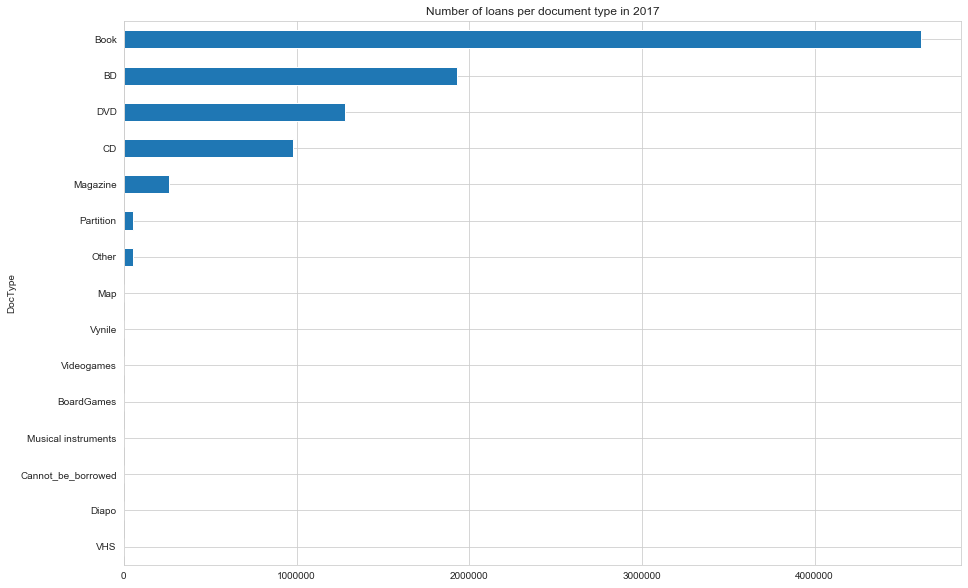

In [263]:
dataBook.groupby('DocType')['Nombre_de_prêts_2017'].agg('sum').sort_values(ascending=True).plot(kind='barh',figsize=(15,10))

plt.title('Number of loans per document type in 2017')

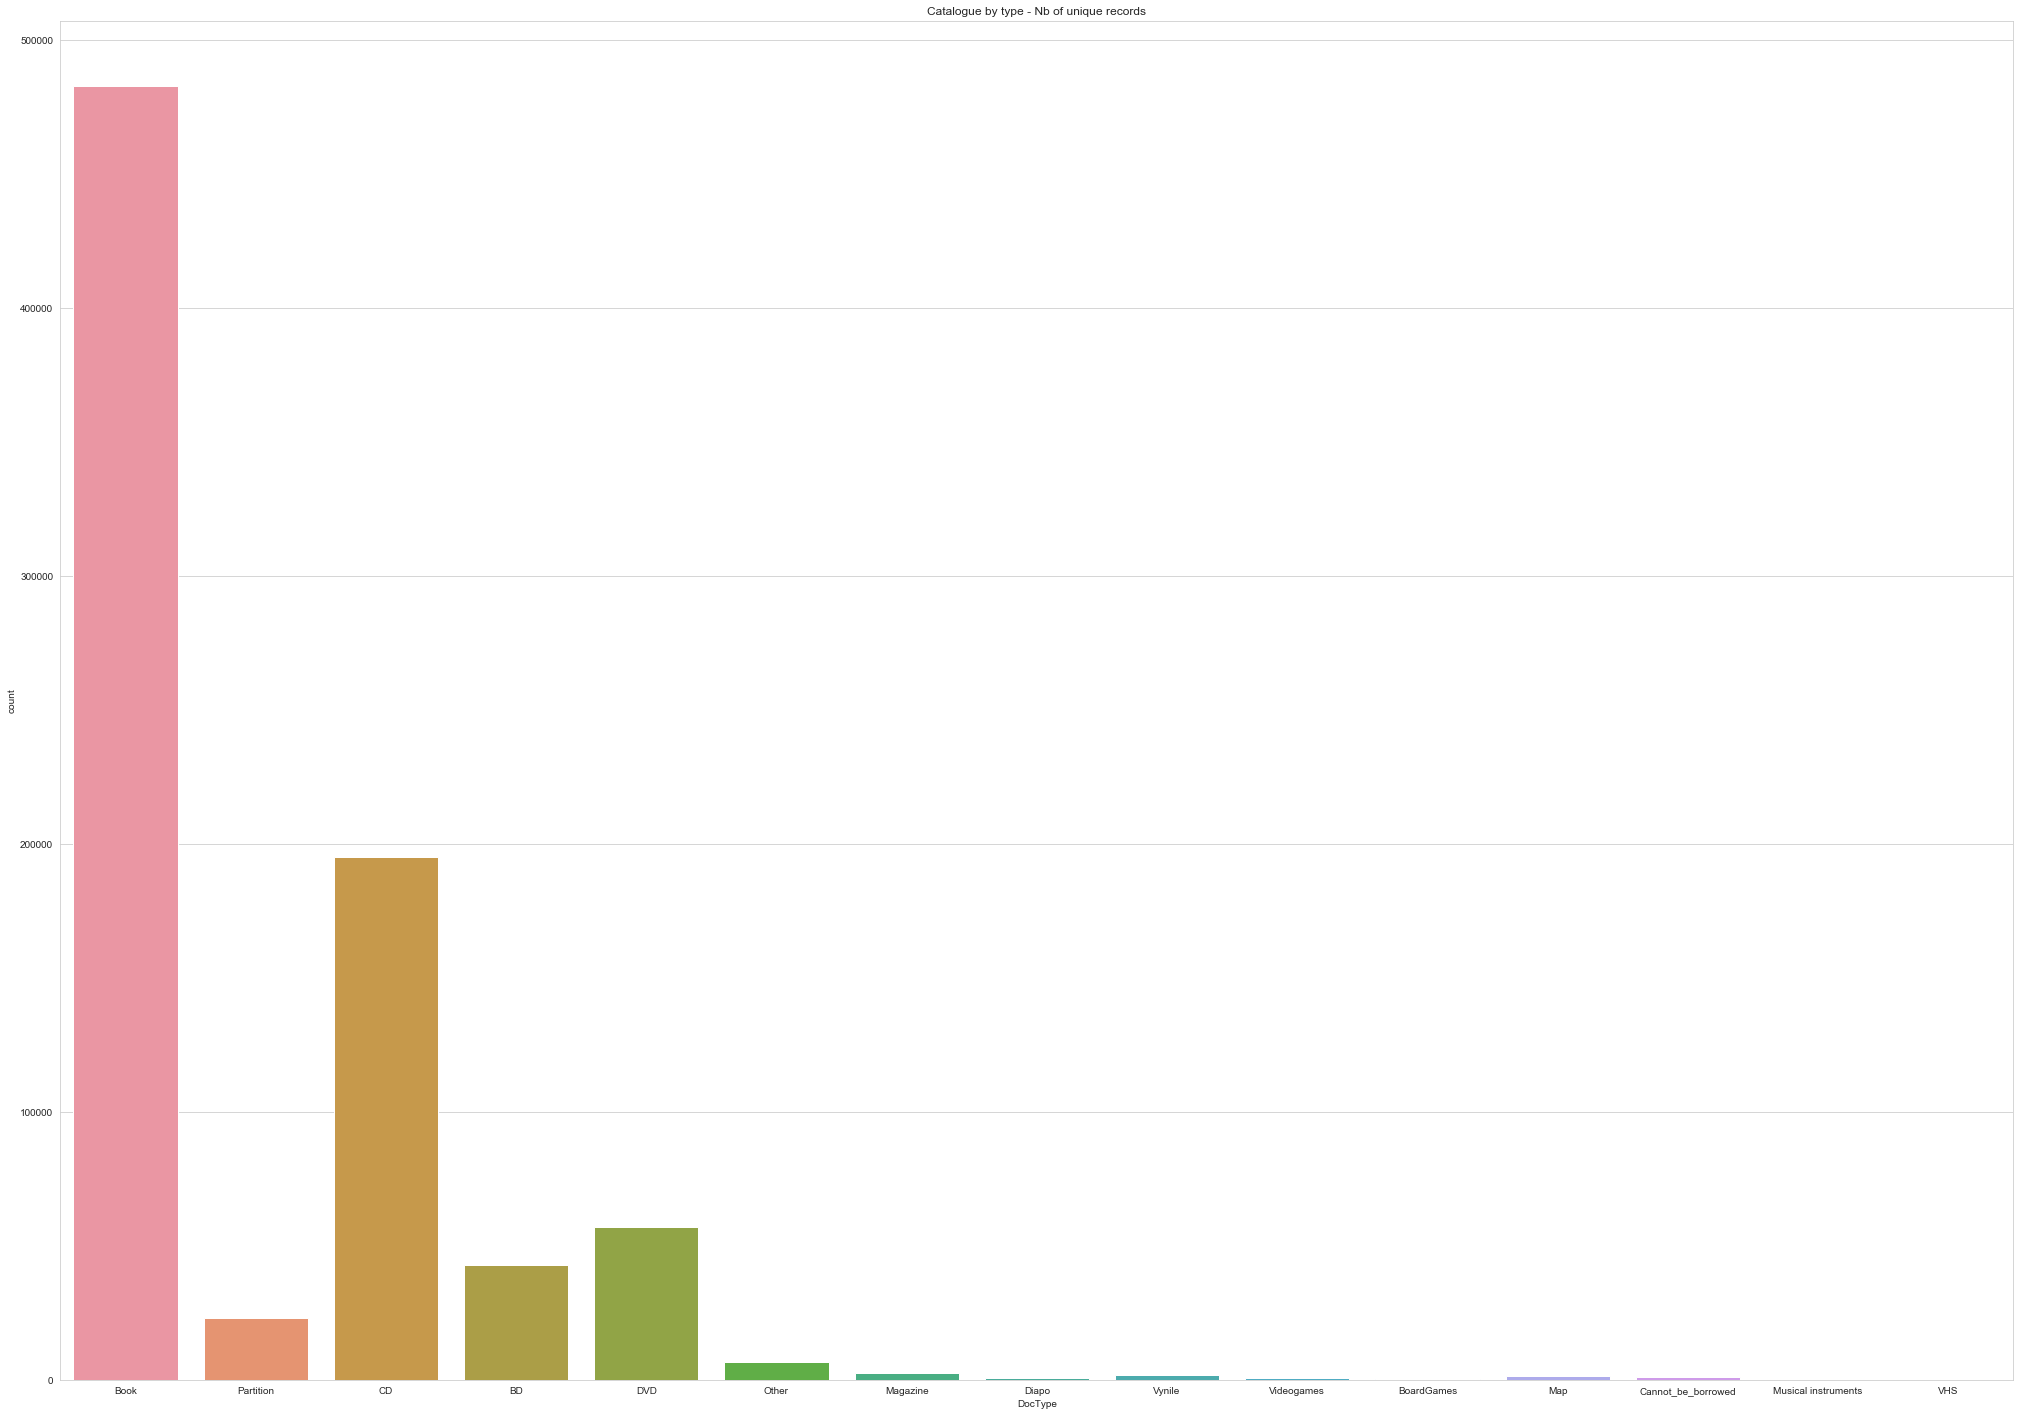

In [265]:
fig, ax = plt.subplots(figsize=(35,25))
sns.countplot(dataBook['DocType'])
plt.title('Catalogue by type - Nb of unique records')
plt.show()

In [270]:
# function ratio 
def weird_division(n, d):
    return n / d if d else 0

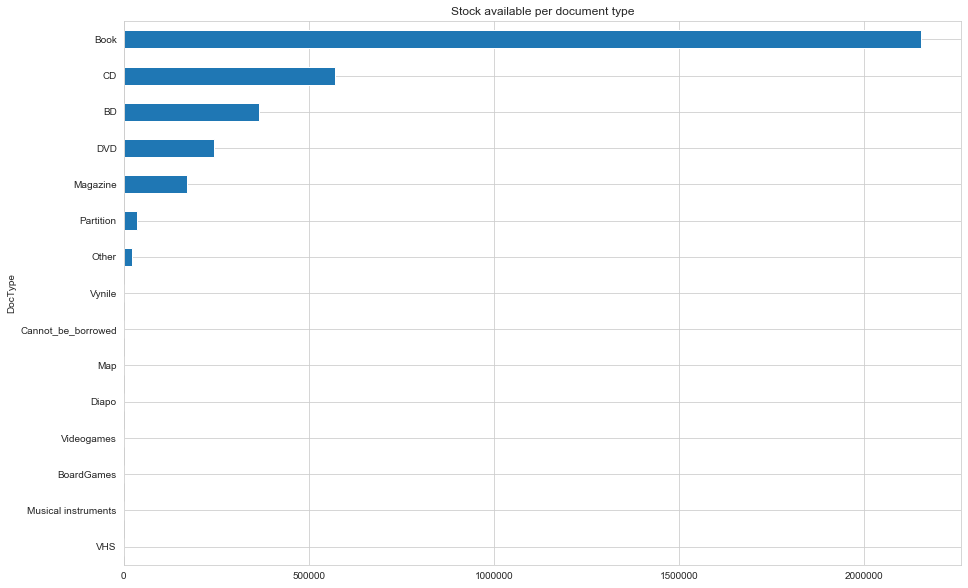

DocType
Book                   2152731.0
CD                      570734.0
BD                      363790.0
DVD                     242277.0
Magazine                169510.0
Partition                36064.0
Other                    23001.0
Vynile                    1659.0
Cannot_be_borrowed        1468.0
Map                       1356.0
Diapo                      923.0
Videogames                 739.0
BoardGames                 721.0
Musical instruments         25.0
VHS                          5.0
Name: Nombre_d'exemplaires, dtype: float64

In [281]:


# Plot Number of loans by document type and  total number of document available('Nombre d'examplaires')
dataBook.groupby('DocType')["Nombre_d'exemplaires"].agg('sum').sort_values(ascending=True).plot(kind='barh',figsize=(15,10))
plt.title('Stock available per document type')
plt.show()
dataBook.groupby('DocType')["Nombre_d'exemplaires"].agg('sum').sort_values(ascending=False)

# TO DO :Plot Number of loans by document type and  total number of document available('Nombre d'examplaires')


In [ ]:
# Plot Number of loans by document type and  total number loans

 

In [196]:
#Look at the different types/format of info in Date columns
# Date give us more or less the age of the book (printing, edition,)
dataBook['Date'].value_counts().to_dict()

{'2004': 25126,
 '2017': 24924,
 '2003': 23471,
 '2002': 21567,
 '2001': 19751,
 '2000': 18409,
 '2005': 18177,
 '1999': 17394,
 '2012': 17081,
 '2006': 17042,
 '2016': 16909,
 '2007': 16603,
 '1998': 16184,
 '2011': 15227,
 '1997': 14965,
 '2015': 14721,
 '2013': 14272,
 '2014': 14250,
 '2008': 14098,
 '1996': 13789,
 '1995': 13665,
 '1994': 13337,
 '2010': 13291,
 'DL 2015': 12616,
 '1992': 12588,
 '1990': 12172,
 '1993': 12131,
 '1991': 12121,
 '2009': 12069,
 '1989': 10732,
 'DL 2016': 9864,
 'impr. 2013': 9474,
 '1988': 9292,
 'impr. 2010': 9060,
 '1987': 8354,
 'impr. 2009': 8346,
 '2018': 8341,
 'impr. 2011': 8128,
 'impr. 2008': 8086,
 'impr. 2012': 7975,
 '1986': 7528,
 'impr. 2007': 7518,
 'DL 2014': 7309,
 'impr. 2014': 6990,
 'DL 2010': 6773,
 'DL 2013': 6557,
 'DL 2009': 6553,
 'DL 2008': 6486,
 'impr. 2006': 6247,
 '1985': 6196,
 'DL 2011': 6086,
 'DL 2012': 5732,
 'DL 2007': 5599,
 '1984': 5435,
 'impr. 2005': 4780,
 'DL 2006': 4719,
 '1983': 4490,
 '1982': 3976,
 'DL 20

In [286]:
dataBook['Date'].isna().sum()

4725

In [294]:
#fill missing date with na
dataBook['Date'].fillna('UnknownDate',inplace=True)

In [295]:
# Format of Date are pretty different. Some values are not complete or not data

#Action:correct date to Year only

#check if string contains a number
def hasNumbers(inputString):
    return bool(re.search(r'\d', inputString))

# find all date or date like (finding digit)
def findDate(x):
    if hasNumbers(x):
        return re.findall(r'\d+',x)
    else:
        return x

def findDate2(x):
    return re.findall(r'\d{4}',x)


In [311]:
dataBook['DateAge']=dataBook['Date'].map(lambda x : findDate(x))

In [313]:
dataBook['DateAge'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1652, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[2013]                35112
[2012]                35081
[2007]                34011
[2010]                33944
[2008]                33731
                      ...  
[1991, 1995, 1998]        1
[1979, 2012]              1
[15, 06, 2013]            1
[1971, 1986]              1
[1973, 1992]              1
Name: DateAge, Length: 1404, dtype: int64

In [ ]:

 'ISSN': 813046,a dropper?
 'EAN': 416532,
 'Langue': 81024,

 'Edition': 753989, a dropper?
 'Editeur': 5012,
 'Date': 4727,
 'Format': 9126,
 'Collection': 452201,
 'Titre_de_série': 731570,
 'N°': 747164, a dropper?

 'Dates': 780798, # Date coauteur?

In [312]:
#Reduce scope of study to Books, BD

,N°_de_notice,ISBN,ISSN,EAN,Langue,Titre,Edition,Editeur,Date,Format,...,Co-auteur,Auteur_secondaire,Collectivité_auteur,Collectivité_auteur_secondaire_,Collectivité_co-auteur_,Author,Author_secondary,Co_Author,DocType,DateAge
0,176870,NaN,NaN,NaN,français,La Politique étrangère en France | Texte impri...,NaN,Documentation française ;Ministère des affaire...,2003,386 p. | 28 cm,...,NaN,NaN,FRANCE. Direction de la documentation française,France. Ministère des relations extérieures;Di...,NaN,UnknownAuthor,UnknownAuthor,UnknownAuthor,Book,[2003]
1,176733,2-8435-2107-6,NaN,NaN,français,Voyages en Sicile | Texte imprimé | Dominique ...,NaN,"Diderot éditeur, arts et sciences",1998,1 vol. (299 p.) | 18 cm,...,NaN,NaN,NaN,NaN,NaN,Dominique Vivant Denon,UnknownAuthor,UnknownAuthor,Book,[1998]
2,176766,2-259-00278-1,NaN,NaN,français,0Voyages | [2] | Russie | Texte imprimé | Niko...,NaN,Plon,1977,322 p.-[1] f. de pl. | 20 cm,...,NaN,"Princet, Liliane",NaN,NaN,NaN,Níkos Kazantzákīs,Liliane Princet,UnknownAuthor,Book,[1977]
3,176779,NaN,NaN,NaN,français,L'harmonica blues pour débutants | Texte imprimé,NaN,Emf,1997,1 méthode musicale (62 p.) | 30 cm | éventuell...,...,NaN,NaN,NaN,NaN,NaN,Mick Kinsella,UnknownAuthor,UnknownAuthor,Partition,[1997]
4,176892,0-06-443063-4,NaN,NaN,anglais,A letter to Amy | Texte imprimé | Ezra Jack Keats,NaN,Harper Trophy,1984,30 p. | ill. en coul. | 21 cm,...,NaN,NaN,NaN,NaN,NaN,Ezra Jack Keats,UnknownAuthor,UnknownAuthor,Book,[1984]
